In [15]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color.palettes import rgb


read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [16]:
# party to analyse
party = 'Grüne'

In [17]:
# Iraq war
this_df = df[(df['date'].dt.year >= 2002) & (df['date'].dt.year <= 2004)]

# ukraine war
#this_df = df[(df['date'].dt.year >= 2022)]

high_values = this_df[this_df['standardized_war_articles'] >= 0.2]
first = high_values['date'].iloc[-1]
last = high_values['date'].iloc[0]


In [18]:
# training and testing
data_before_war = df[(df['date'] <= first) & (~df[party].isna())]

X = data_before_war.index.values.reshape(-1,1)
y = data_before_war[party]
# Split the data into training and test sets


polynomial_features= PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)


In [19]:
# validaten for media relevant
data_war = df[(df['date'] >= first) & (df['date'] <= last)]

X_val = data_war.index.values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
X_val_poly = polynomial_features.fit_transform(X_val)
y_val = data_war[party]

In [20]:
model = sm.OLS(y, X_poly).fit()
y_pred = model.predict(X_poly) 

In [21]:
# how accuarte is the model? 
# Calculate MSE and R-squared
mse_train = mean_squared_error(y, y_pred)
print('mse train',mse_train)
r2_train = r2_score(y, y_pred)
print('r2_train', r2_train)

mse train 0.622742942860499
r2_train 0.786632423023975


In [22]:
y_val_pred = model.predict(X_val_poly) 

In [23]:
# how big is the difference?
# Calculate MSE and R-squared
mse_train = mean_squared_error(y, y_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
print('mse train',mse_train)
print('mse_val', mse_val)
r2_train = r2_score(y, y_pred)
r2_val = r2_score(y_val, y_val_pred)
print('r2_train', r2_train)
print('r2_val', r2_val)

mse train 0.622742942860499
mse_val 27.38213021769045
r2_train 0.786632423023975
r2_val -52.11189050845129


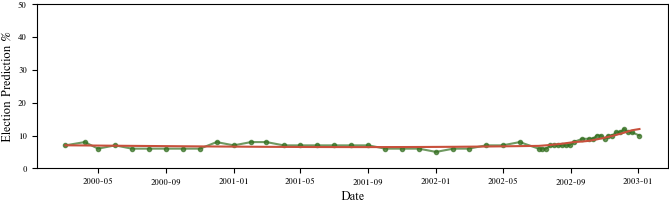

In [24]:
# plot
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
fig, ax1 = plt.subplots()
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_before_war['date'],y_pred , color = rgb.tue_ocre)

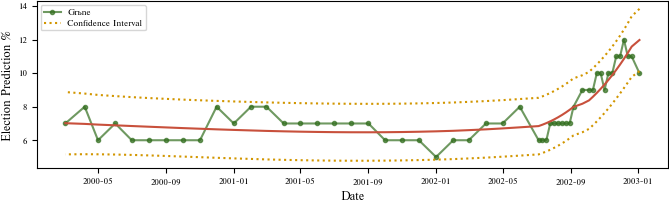

In [25]:
# plot with confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_before_war['date'],y_pred, color = rgb.tue_ocre)
ax1.plot(data_before_war['date'],upper,':',label="Confidence Interval", color = rgb.tue_orange) # confid. intrvl
ax1.plot(data_before_war['date'],lower,':', color = rgb.tue_orange)
ax1.legend(loc='upper left')

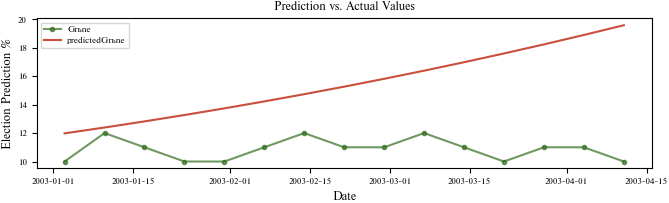

In [26]:
# predicted vs actual values
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_war['date'],y_val_pred, label = "predicted" + party, color = rgb.tue_ocre)
ax1.set_title("Prediction vs. Actual Values")
#ax1.plot(data_war['date'],upper,'--',label="Upper") # confid. intrvl
#ax1.plot(data_war['date'],lower,':',label="lower")
ax1.legend(loc='upper left')

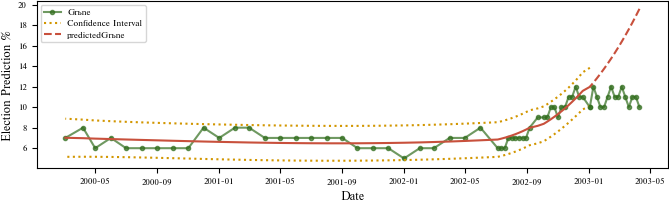

In [27]:
# plot with confidence interval
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_before_war['date'], data_before_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_darkgreen, alpha=0.7)


ax1.plot(data_before_war['date'],y_pred, color = rgb.tue_ocre)
ax1.plot(data_before_war['date'],upper,':',label="Confidence Interval", color = rgb.tue_orange) # confid. intrvl
ax1.plot(data_before_war['date'],lower,':', color = rgb.tue_orange)


ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-', color=rgb.tue_darkgreen, alpha=0.7)
ax1.plot(data_war['date'],y_val_pred, linestyle='--', color = rgb.tue_ocre, label = 'predicted' + party)

#plt.fill_between(data_war['date'], upper, lower, color = rgb.tue_orange, alpha=0.3)
#ax1.vlines(first, ymin=0, ymax = 20, colors="grey")
ax1.legend(loc='upper left')
plt.savefig('Polynomial Regression Iraq war' + '.pdf', format='pdf')

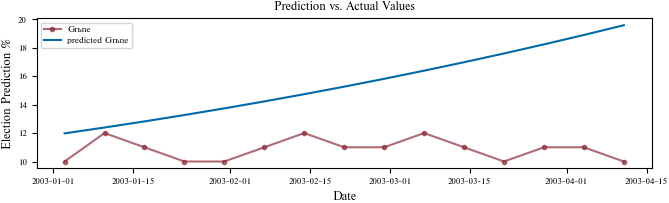

In [28]:
## Example tueplots
# its not saving as a pdf..

# predicted vs actual values
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

from tueplots import bundles
# # this provides the color palette of Uni Tuebingen
from tueplots.constants.color.palettes import rgb
# # e.g. as rgb.tue_blue, rgb.tue_red, etc.
# # set plotting stylesheet
#half of page
#plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))
# full page
plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

# plotting code goes here
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war[party], marker='.', linestyle='-',label=party, color=rgb.tue_red, alpha=0.7)
ax1.plot(data_war['date'],y_val_pred, label = "predicted " + party, color = rgb.tue_blue)
ax1.set_title("Prediction vs. Actual Values")
ax1.legend(loc='upper left')

plt.savefig('your_plot.pdf', format='pdf')

plt.show()
# this file can now by used as \includegraphics{filename}
